In [5]:
import pandas as pd
from textblob import TextBlob

# Load the dataset
file_path = 'cleaned_Mobile_Phone_Data.csv'
data = pd.read_csv(file_path)

# Function to perform sentiment analysis using TextBlob
def analyze_sentiment(text):
    # Perform sentiment analysis using TextBlob
    blob = TextBlob(text)
    polarity = blob.sentiment.polarity  # Get the polarity score
    
    # Classify sentiment based on polarity score
    if polarity > 0:
        sentiment = 'Positive'
    elif polarity < 0:
        sentiment = 'Negative'
    else:
        sentiment = 'Neutral'
    
    return sentiment, polarity  # Return both sentiment and polarity score

# Apply the function to the 'Review' column and expand the result into two columns
data[['Sentiment', 'Sentiment_Score']] = data['Review'].apply(analyze_sentiment).apply(pd.Series)

# Save the results to a CSV file
data.to_csv('mobile_sentiment_analysis_with_scores.csv', index=False)

# Display the first few rows of the data with sentiment and score
print(data[['Review', 'Sentiment', 'Sentiment_Score']].head())


                                              Review Sentiment  \
0                                       superb phone  Positive   
1     amazing camera and good performancebest choice  Positive   
2  this time samsung does very well currently bes...  Positive   
3  amazing product light weight best camera handy...  Positive   
4  portrait mode is excellent night mode performa...  Positive   

   Sentiment_Score  
0         1.000000  
1         0.650000  
2         0.600000  
3         0.562857  
4         0.329762  


 Distribution of Sentiment Classes

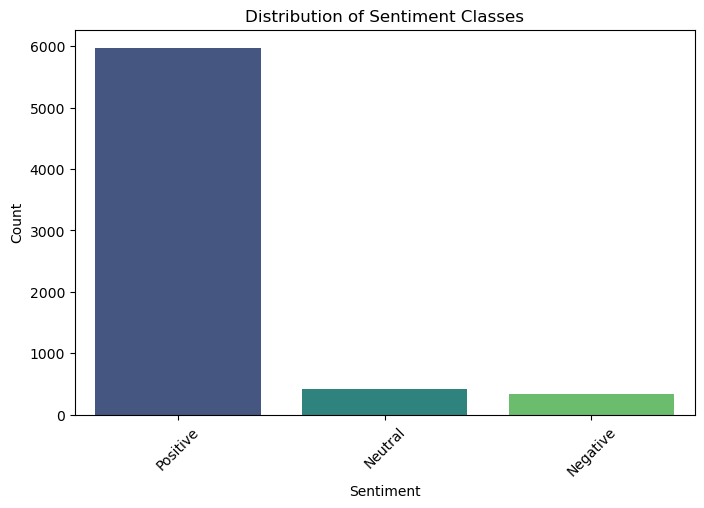

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

# Count the number of occurrences of each sentiment
sentiment_counts = data['Sentiment'].value_counts()

# Bar chart
plt.figure(figsize=(8, 5))
sns.barplot(x=sentiment_counts.index, y=sentiment_counts.values, palette='viridis')
plt.title('Distribution of Sentiment Classes')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


Sentiment Score Distribution

c:\Users\dhina\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


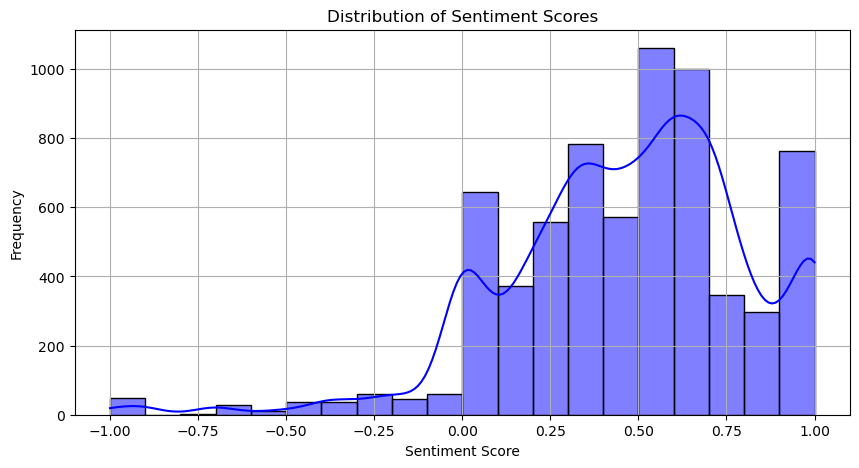

In [7]:
plt.figure(figsize=(10, 5))
sns.histplot(data['Sentiment_Score'], bins=20, kde=True, color='blue')
plt.title('Distribution of Sentiment Scores')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.grid()
plt.show()


Word Cloud of Reviews

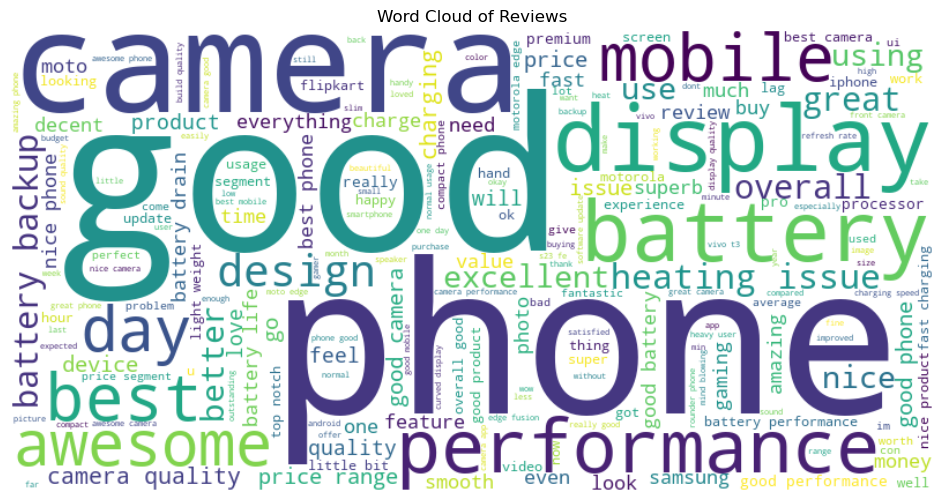

In [11]:
from wordcloud import WordCloud

# Combine all reviews into a single text
all_reviews = ' '.join(data['Review'].tolist())

# Create the word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_reviews)

# Display the word cloud
plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')  # Turn off axis
plt.title('Word Cloud of Reviews')
plt.show()
